In [2]:
import numpy as np
import matplotlib.pyplot as plt
import camb

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


In [3]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
omega_nh2 = 0
ns = 0.965
tau = 0.054

In [4]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [5]:
pars.set_dark_energy(w=-1);
results = camb.get_results(pars)
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

In [6]:
### Set matter power spectrum ###
z_min = 0
z_max = 2000
z = np.linspace(z_min , z_max , 10)

### Set matter power spectrum ###
pars.set_matter_power(redshifts=z, kmax=1)
results = camb.get_results(pars)

### Get matter power spectrum ###
kh, Z, PK = results.get_linear_matter_power_spectrum(hubble_units = True , k_hunit = True)
kh_nl, Z_nl, PK_nl = results.get_linear_matter_power_spectrum(hubble_units = True , k_hunit = True , nonlinear=True)

Note: redshifts have been re-sorted (earliest first)


# P5: Matter Power Spectrum

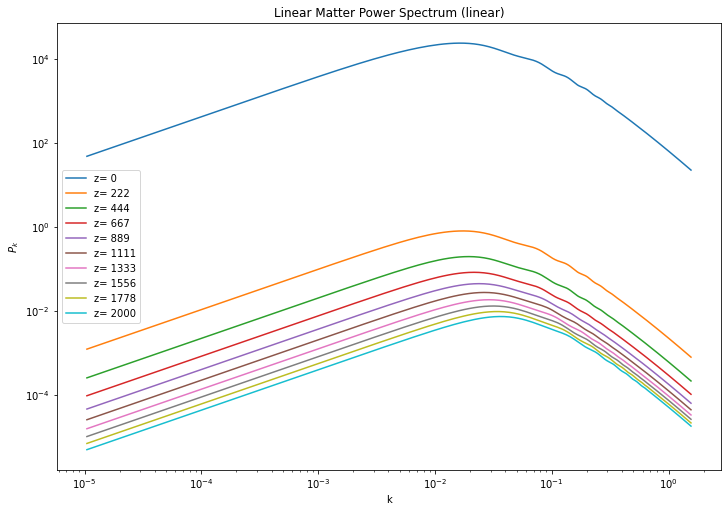

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(10,7), constrained_layout = True)
for iz in range(len(z)):
    ax.loglog(kh , PK[iz] , label = 'z= ' + str('%.0f'%z[iz]))
    ax.set_title('Linear Matter Power Spectrum (linear)')
    ax.set_xlabel('k')
    ax.set_ylabel('$P_k$')
    ax.legend()

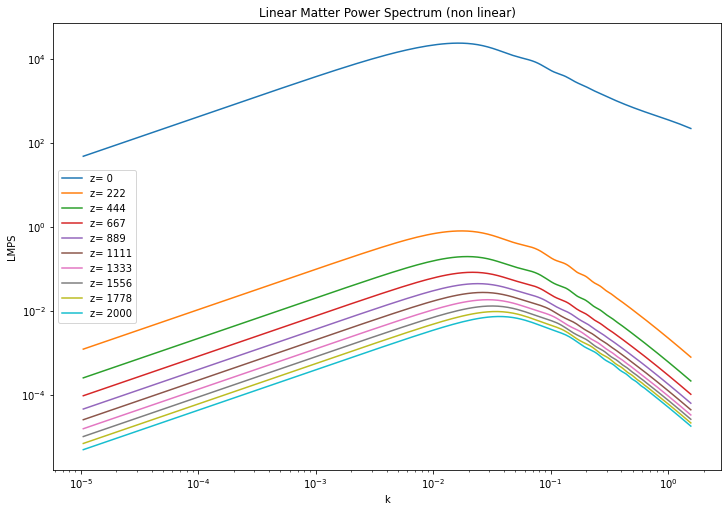

In [8]:
### Ahora no lineal ###
fig_nl, ax_nl = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(10,7), constrained_layout = True)
for iz in range(len(z)):
    ax_nl.loglog(kh_nl , PK_nl[iz] , label = 'z= ' + str('%.0f'%z[iz]))
    ax_nl.set_title('Linear Matter Power Spectrum (non linear)')
    ax_nl.set_xlabel('k')
    ax_nl.set_ylabel('LMPS')
    ax_nl.legend()

In [9]:
### Ahora con la masa de neutrinos nula ###
pars_nu0 = camb.CAMBparams()
pars_nu0.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, mnu = omega_nh2, tau=tau)
pars_nu0.set_matter_power(redshifts=z, kmax=1)
results_nu0 = camb.get_results(pars)

### Get matter power spectrum ###
kh, Z, PK = results.get_linear_matter_power_spectrum(hubble_units = True , k_hunit = True)
kh_nl, Z_nl, PK_nl = results.get_linear_matter_power_spectrum(hubble_units = True , k_hunit = True , nonlinear=True)

Note: redshifts have been re-sorted (earliest first)


In [10]:
### Ahora con la masa de neutrinos nula ###
pars_nu0 = camb.CAMBparams()
pars_nu0.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, mnu=0.0, num_massive_neutrinos=0, tau=tau)
pars_nu0.set_matter_power(redshifts=z, kmax=1)
results_nu0 = camb.get_results(pars_nu0)

### Get matter power spectrum ###
kh_nu0, Z_nu0, PK_nu0 = results_nu0.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)
kh_nl_nu0, Z_nl_nu0, PK_nl_bu0 = results_nu0.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True, nonlinear=True)


Note: redshifts have been re-sorted (earliest first)


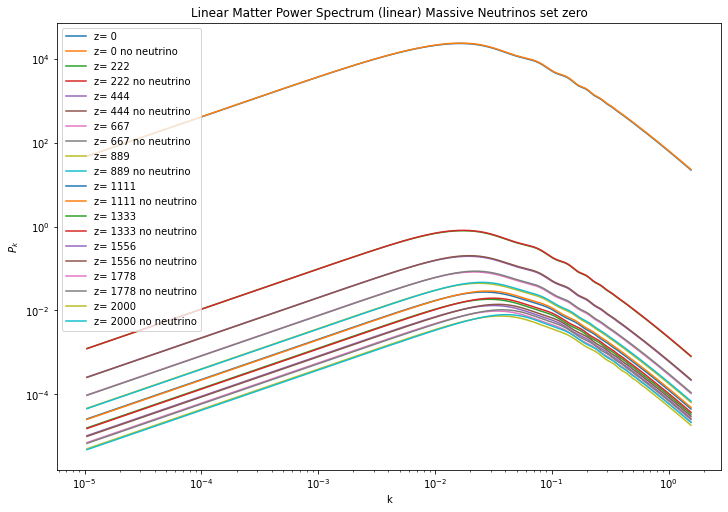

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(10,7), constrained_layout = True)
for iz in range(len(z)):
    ax.loglog(kh , PK[iz] , label = 'z= ' + str('%.0f'%z[iz]))
    ax.loglog(kh_nu0 , PK_nu0[iz] , label = 'z= ' + str('%.0f'%z[iz]) + ' no neutrino')
    ax.set_title('Linear Matter Power Spectrum (linear) Massive Neutrinos set zero')
    ax.set_xlabel('k')
    ax.set_ylabel('$P_k$')
    ax.legend()

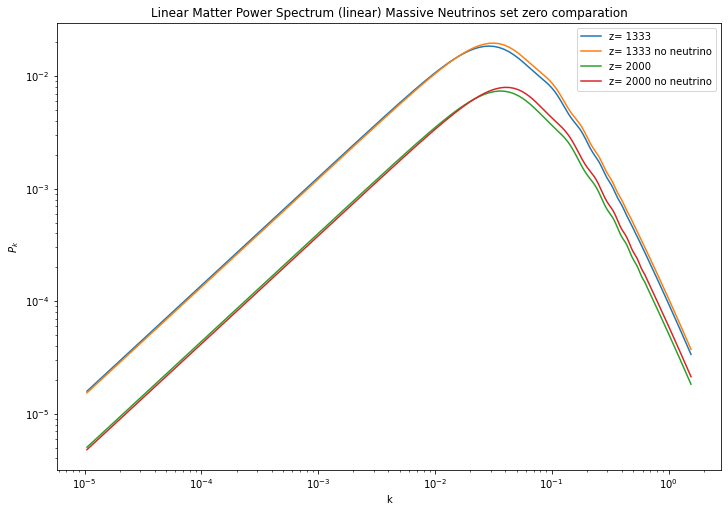

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(10,7), constrained_layout = True)
ax.loglog(kh , PK[6] , label = 'z= ' + str('%.0f'%z[6]))
ax.loglog(kh_nu0 , PK_nu0[6] , label = 'z= ' + str('%.0f'%z[6]) + " no neutrino")
ax.loglog(kh , PK[-1] , label = 'z= ' + str('%.0f'%z[-1]))
ax.loglog(kh_nu0 , PK_nu0[-1] , label = 'z= ' + str('%.0f'%z[-1]) + " no neutrino")

ax.set_title('Linear Matter Power Spectrum (linear) Massive Neutrinos set zero comparation')
ax.set_xlabel('k')
ax.set_ylabel('$P_k$')
ax.legend()

## Comentarios P5

Podemos ver de primeras dos evoluciones en el power spectrum a medida que disminuimos el redshift: 1) el power spectrum es, en todo k, mayor a medida que disminuimos el redshift y 2) el máximo se desplaza a numeros de onda cada vez más pequeños.

Esto se puede explicar con la forma en la que evolucionan de las estructuras en el universo: por colapso gravitacional. A edades tempranas las pequeñas perturbaciones en densidad son, pequeñas, pero a medida que avanza el tiempo (disminuyendo el redshift) estas pequeñas perturbaciones van creciendo en amplitud, se van acentuando cada vez más porque la materia cae a lugares en donde hay más materia, dejando zonas levemente despobladas con cada vez menos densidad y zonas más densas cada vez más pobladas, por lo que el matter power spectrum aumenta en todo k por el colapso gravitacional.

Estas estructuras han crecido a traves del tiempo, no solo por colapso gravitacional sino también por la propia expansion del universo, por lo que a medida que avanza el tiempo esperaríamos que estas estructuras sean cada vez de mayor escala, lo que implica en menor numero de onda, este efecto explica el despazamiendo del peak en cada power spectrum.

Con respecto a los neutrinos, estos se mueven muy rápido, logrando escapar de manera considerable a pozos de potencial debido a las pequeñas perturbaciones, por lo que esperariamos que su precensia no sea relevante en la creacion de estas estructuras que "suben" el power spectrum. Es por esto que al suprimir los neutrinos observamos un aumento en las perturbaciones. Este efecto se conoce como free-streaming neutrinos, el cual da cuenta de que, como estos neutrinos masivos se mueven tan rádipido desde zonas de alta densidad, opacan la creacion de grandes estructuras, por eso que en presencia de neutrinos masivos el power spectrum es menor.

Nota: en k menores a $\sim 10^{-1}$ notamos que los PWS con neutrones masivos son ligeramente mayores que los que no tienen. Esto es porque a escalas lo suficientemente grandes los neutrones sí aportana a la creacion de estructuras, aportan un poco a la densidad total (porque las escalas son tan grandes que no pareciera que se mueven tan rapido).

# P6: TT angular power spectrum

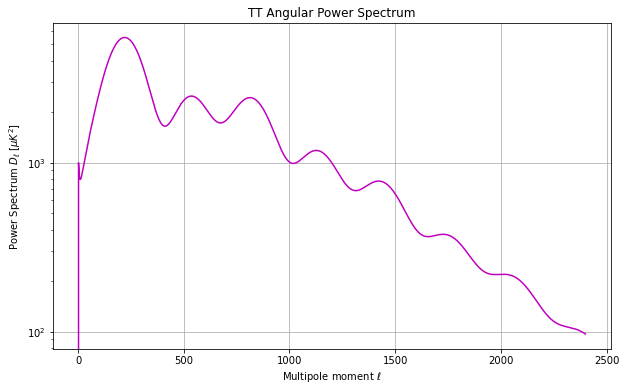

In [16]:
powers = results.get_cmb_power_spectra(pars , CMB_unit='muK')
cmb_spectra = powers['total']
ell = np.arange(cmb_spectra.shape[0])

plt.figure(figsize=(10, 6))
plt.plot(ell, cmb_spectra[:, 0], label='TT' , c = 'm')
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'Power Spectrum $D_\ell$ [$\mu K^2$]')
plt.title('TT Angular Power Spectrum')
#plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

Cambiemos los valores para la densidad de cold dark matter

In [32]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = [0.012 ,0.120 , 0.5]
omega_bh2 = 0.0224
omega_nh2 = 0
ns = 0.965
tau = 0.054

pars_CDM = [camb.CAMBparams() , camb.CAMBparams() , camb.CAMBparams()]

pars_CDM[0].set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2[0], tau=tau)
pars_CDM[0].set_dark_energy(w=-1);
pars_CDM[2].set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2[2], tau=tau)
pars_CDM[2].set_dark_energy(w=-1);
results_CDM = [0,0,0]
results_CDM[0] = camb.get_results(pars_CDM[0])
results_CDM[2] = camb.get_results(pars_CDM[2])
results_CDM[0]

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.012
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   

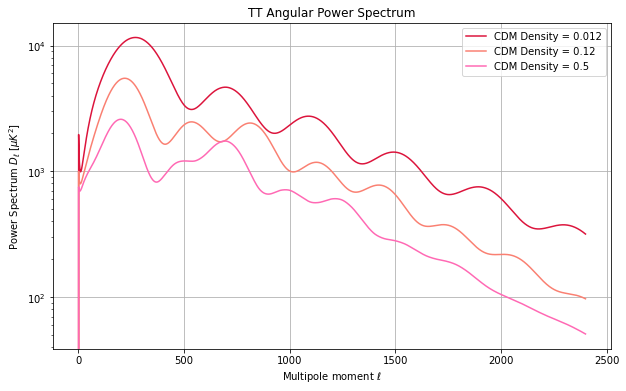

In [40]:
powers_cdm = results_CDM[0].get_cmb_power_spectra(pars_CDM[0] , CMB_unit='muK')
powers_cdm_2 = results_CDM[2].get_cmb_power_spectra(pars_CDM[2] , CMB_unit='muK')
cmb_spectra_CDM = powers_cdm['total']
cmb_spectra_CDM_2 = powers_cdm_2['total']
ell_CDM = np.arange(cmb_spectra_CDM.shape[0])
ell_CDM_2 = np.arange(cmb_spectra_CDM_2.shape[0])

plt.figure(figsize=(10, 6))
plt.plot(ell_CDM, cmb_spectra_CDM[:, 0], label='CDM Density = ' + str(omega_ch2[0]), c = 'crimson')
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'Power Spectrum $D_\ell$ [$\mu K^2$]')
plt.title('TT Angular Power Spectrum')
#plt.legend()
plt.yscale('log')
plt.grid(True)

plt.plot(ell, cmb_spectra[:, 0],label='CDM Density = ' + str(omega_ch2[1]), c = 'salmon')
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'Power Spectrum $D_\ell$ [$\mu K^2$]')
plt.title('TT Angular Power Spectrum')

plt.yscale('log')
plt.grid(True)


plt.plot(ell_CDM_2, cmb_spectra_CDM_2[:, 0], label='CDM Density = ' + str(omega_ch2[2]), c = 'hotpink')
plt.xlabel(r'Multipole moment $\ell$')
plt.ylabel(r'Power Spectrum $D_\ell$ [$\mu K^2$]')
plt.title('TT Angular Power Spectrum')
#plt.legend()
plt.yscale('log')
plt.grid(True)

plt.legend()
plt.show()




In [29]:
omega_ch2[1]

0.12